The following notebook is a perlimanry development of time series analysis using derivatives, especially for kinematics values

### Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [42]:
sys.path.append('/home/omerg/git/mf_analysis')
sys.path.append('/home/omerg/git/mf_analysis/src/multiframe')

In [43]:
from mf_analyzer import MFAnalyzer

### Functions

In [59]:
def plot_derivatives(age, x, title, unit):
    first_derivative = np.diff(x, n=1)
    avg1, std1 = np.mean(first_derivative), np.std(first_derivative)
    second_derivative = np.diff(x, n=2)
    avg2, std2 = np.mean(second_derivative), np.std(second_derivative)
    fig, ax = plt.subplots(3, 1, figsize=(12,8))
    ax[0].plot(age, x, '--bo', label=f'{title}')
    ax[0].set_xlabel('age')
    ax[0].set_ylabel(unit)
    ax[0].legend()
    ax[0].grid()
    ax[0].set_xticks(age)
    
    ax[1].plot(age[1:], first_derivative, '--co', label='first derivative')
    ax[1].plot(age[1:], np.full(len(age[1:]), avg1), label='mean', color='green')
    ax[1].plot(age[1:], np.full(len(age[1:]), 2*std1 + avg1), label=f'2*std',color='red', linestyle='dashed')
    ax[1].plot(age[1:], np.full(len(age[1:]), -2*std1 + avg1), label=f'2*std',color='red', linestyle='dashed')
    ax[1].plot(age[1:], np.full(len(age[1:]), 3*std1 + avg1), label=f'3*std',color='red', linestyle='dashed')
    ax[1].plot(age[1:], np.full(len(age[1:]), -3*std1 + avg1), label=f'3*std',color='red', linestyle='dashed')
    ax[1].set_xlabel('age')
    ax[1].legend()
    ax[1].grid()
    ax[1].set_xticks(age)
    
    ax[2].plot(age[2:], second_derivative, '--mo', label=f'second derivative')
    ax[2].plot(age[2:], np.full(len(age[2:]), avg2), label='mean', color='green')
    ax[2].plot(age[2:], np.full(len(age[2:]), 2*std2 + avg2), label=f'2*std',color='red', linestyle='dashed')
    ax[2].plot(age[2:], np.full(len(age[2:]), -2*std2 + avg2), label=f'2*std',color='red', linestyle='dashed')
    ax[2].plot(age[2:], np.full(len(age[2:]), 3*std2 + avg2), label=f'3*std',color='red', linestyle='dashed')
    ax[2].plot(age[2:], np.full(len(age[2:]), -3*std2 + avg2), label=f'3*std',color='red', linestyle='dashed')
    ax[2].set_xlabel('age')
    ax[2].legend()
    ax[2].grid()
    ax[2].set_xticks(age)
    plt.tight_layout()
    plt.show()

### Inputs

In [60]:
path = '/home/ubuntu/workspace/Omer/mf_analysis/stanch_las_cruces_10_fps__test/cametra_interface_output.tsv'
output_dir = '/home/omerg/workspace/mf_analysis/stanch_las_cruces_10_fps__test'

In [61]:
mfa = MFAnalyzer(path, output_dir=output_dir)

  0%|          | 0/47 [00:00<?, ?it/s]

100%|██████████| 47/47 [00:00<00:00, 207.97it/s]


In [62]:
ped_tracklets = mfa.get_tracklets_by_label(0)

0 with uid:109


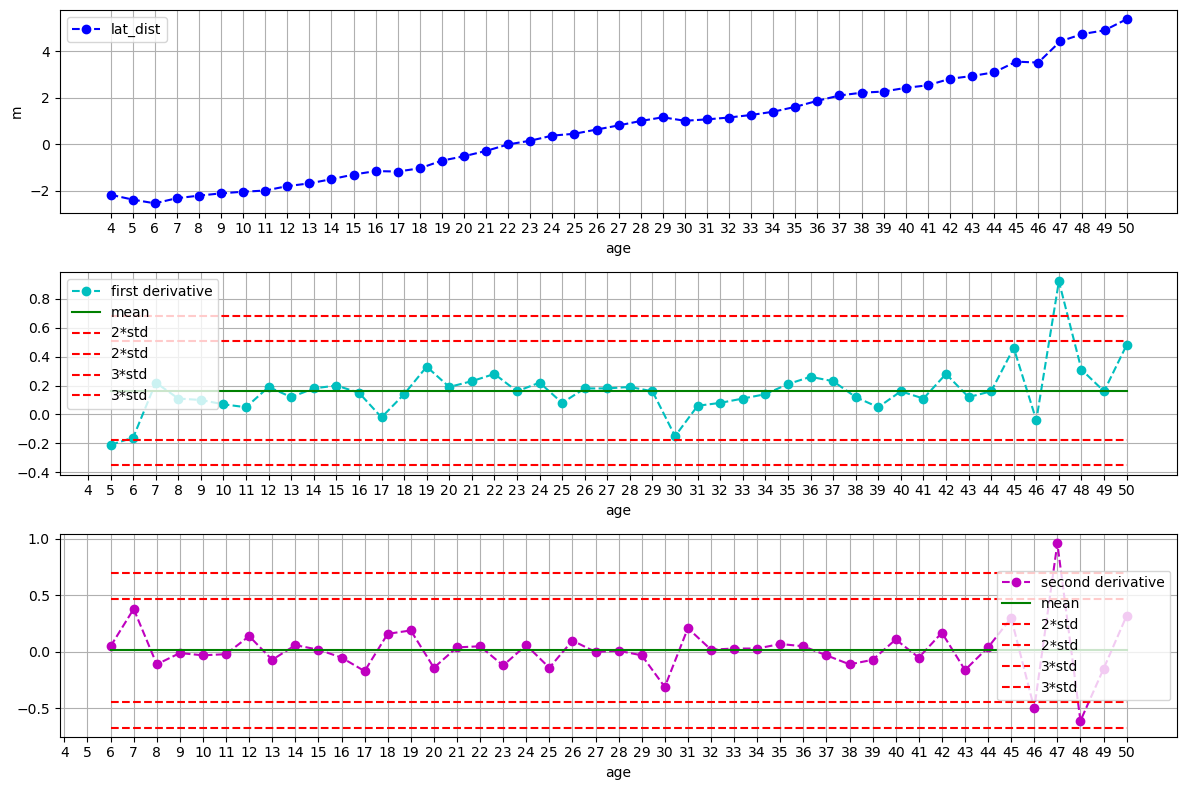

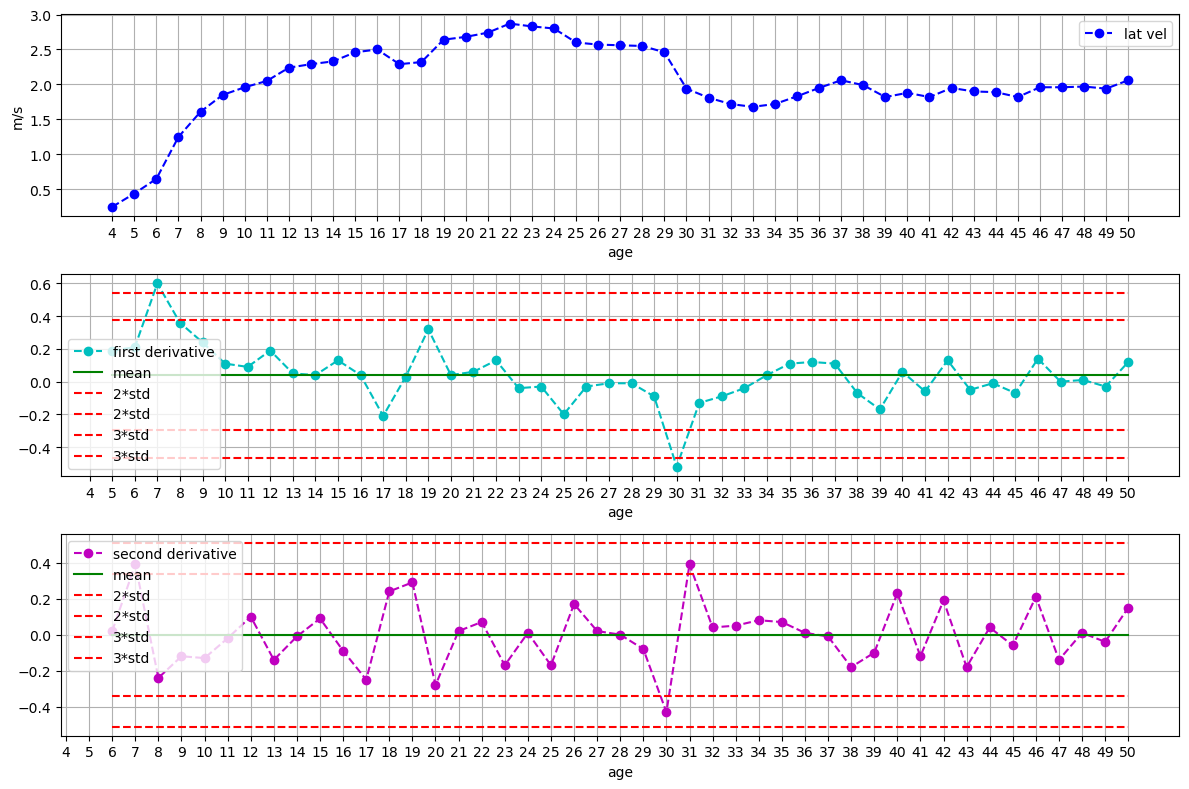

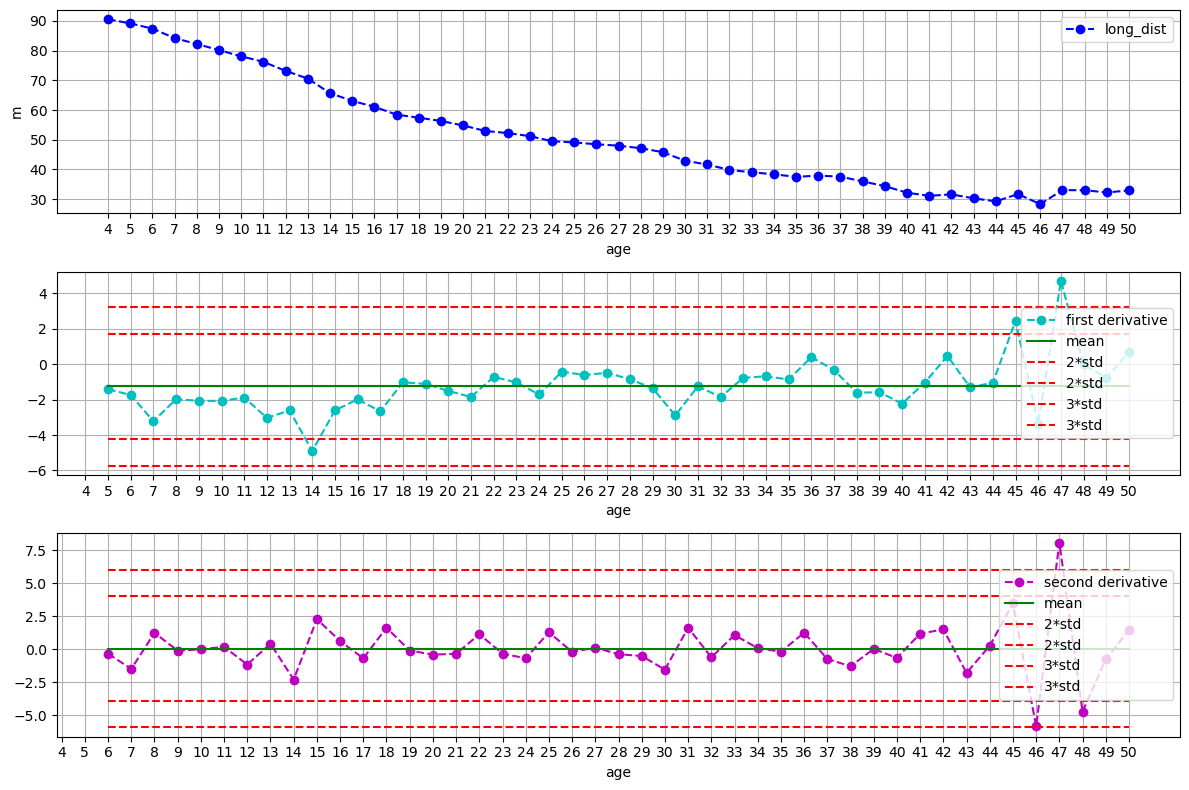

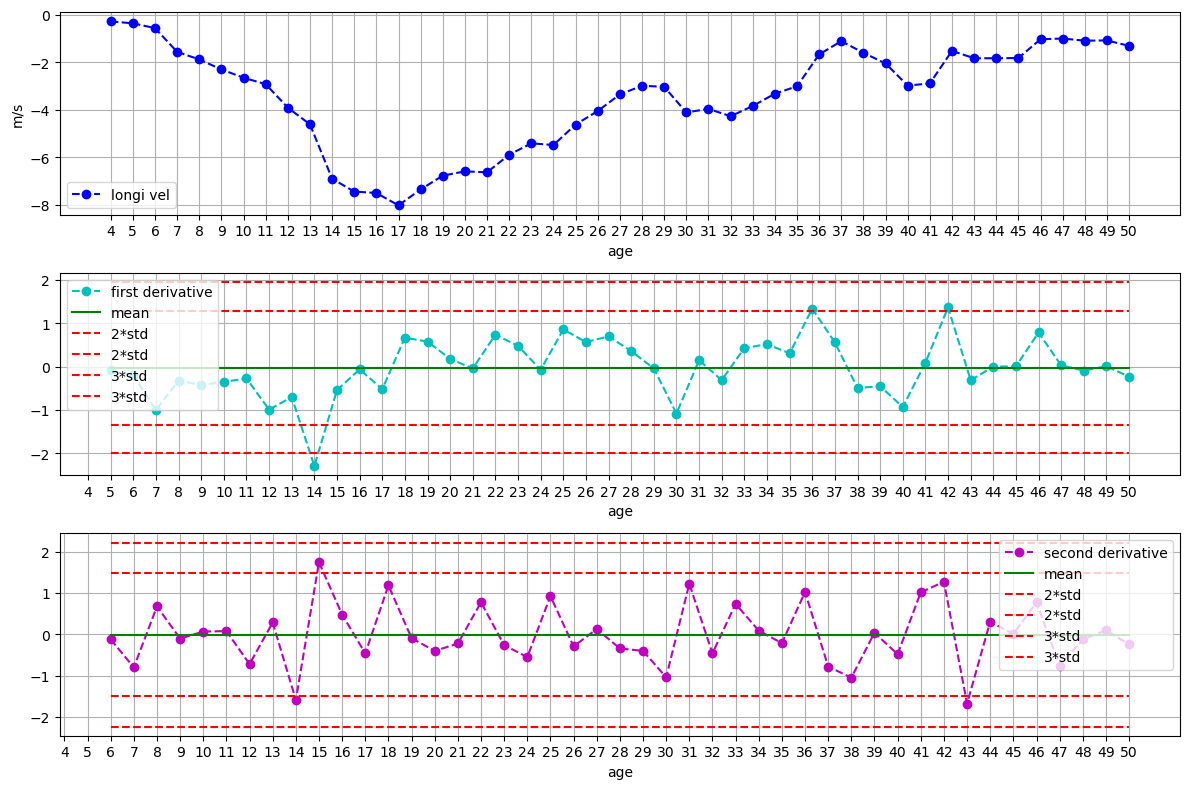

0 with uid:118


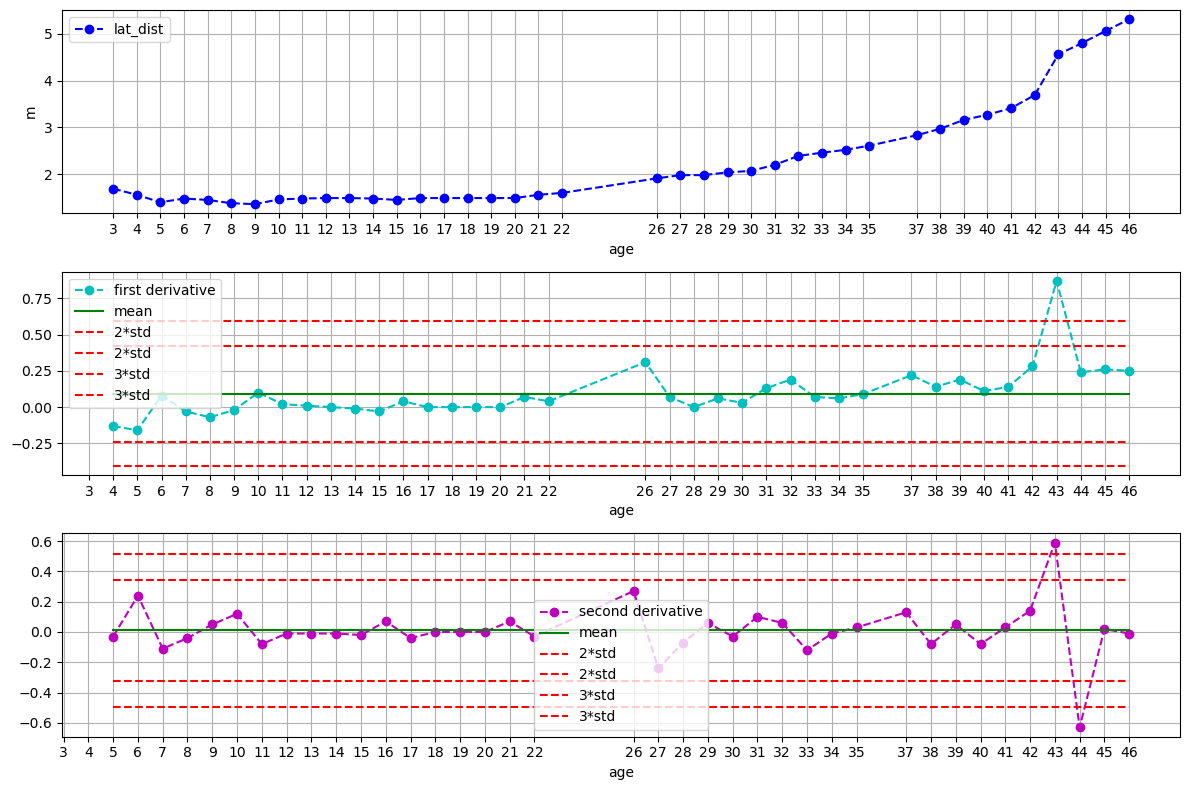

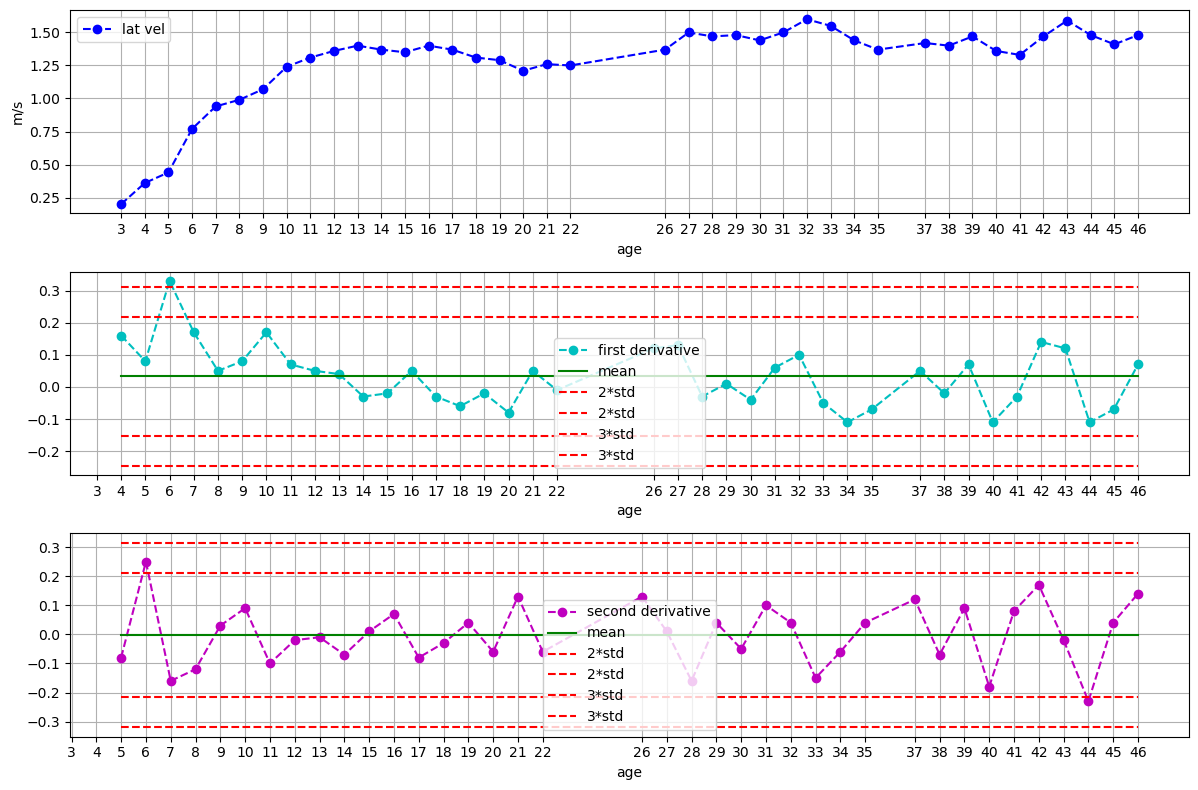

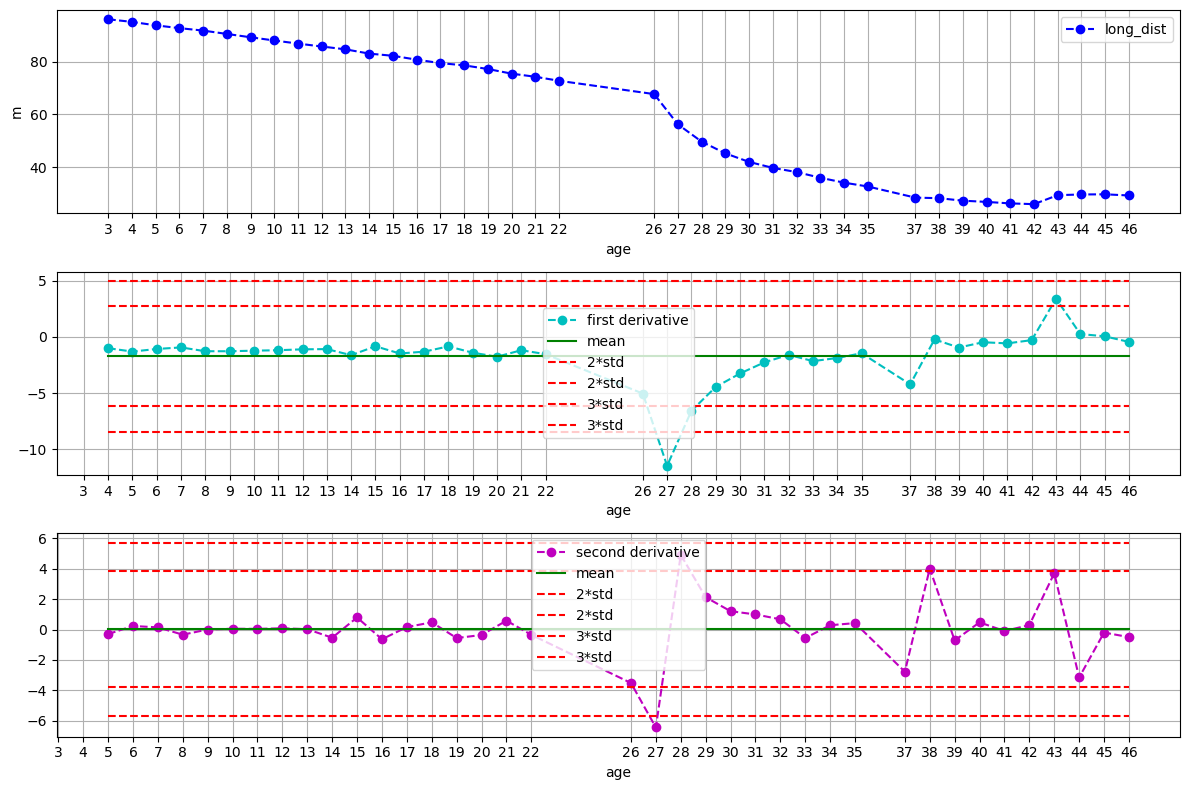

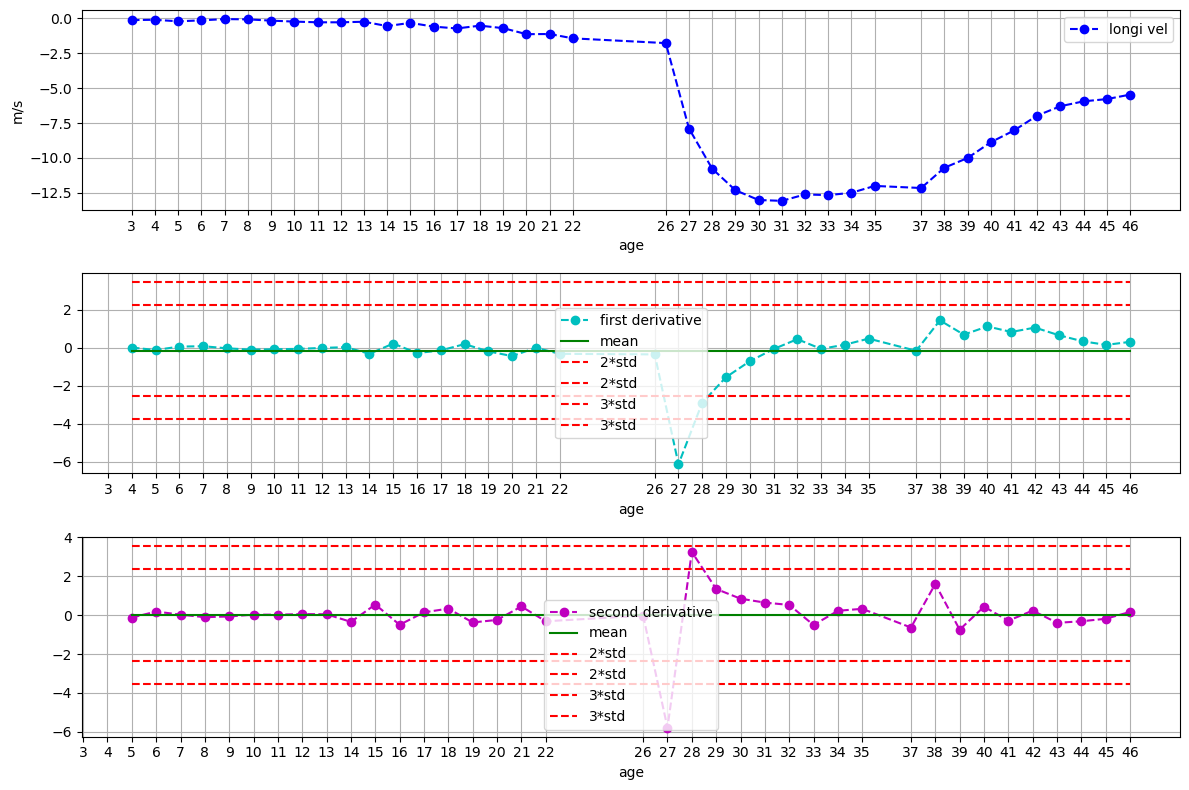

0 with uid:130


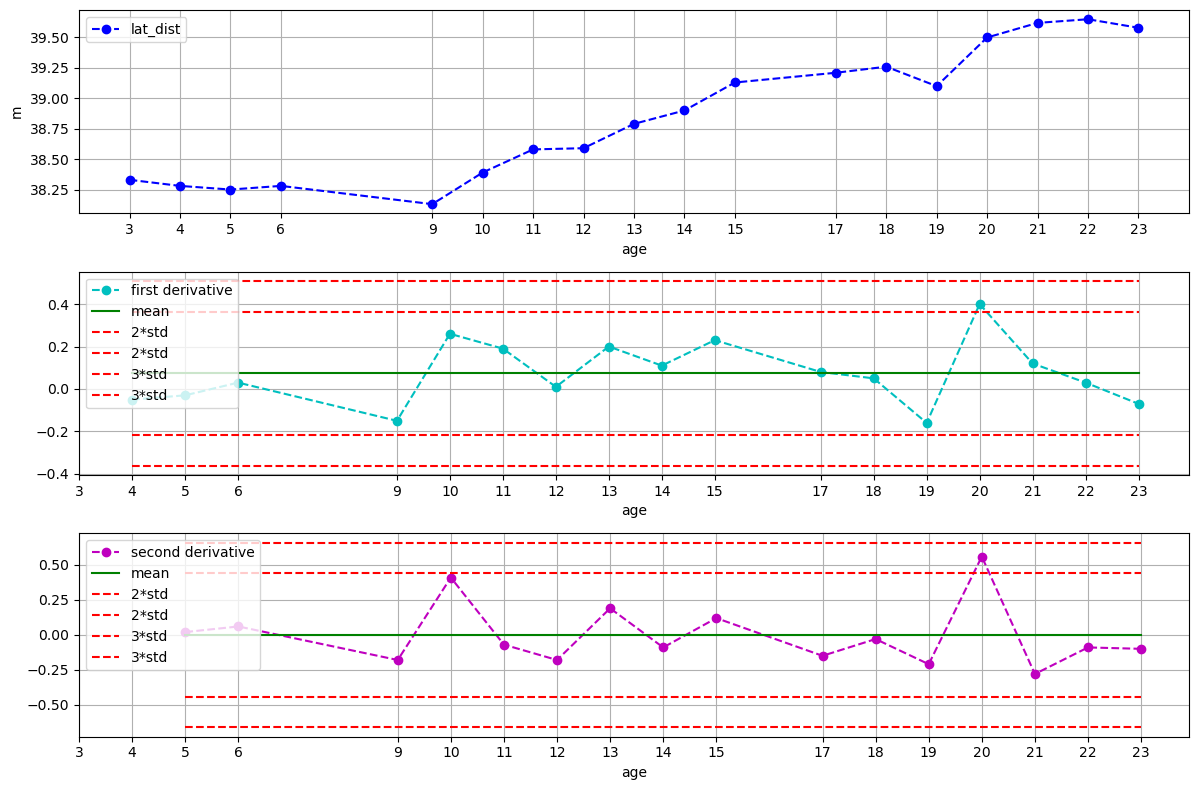

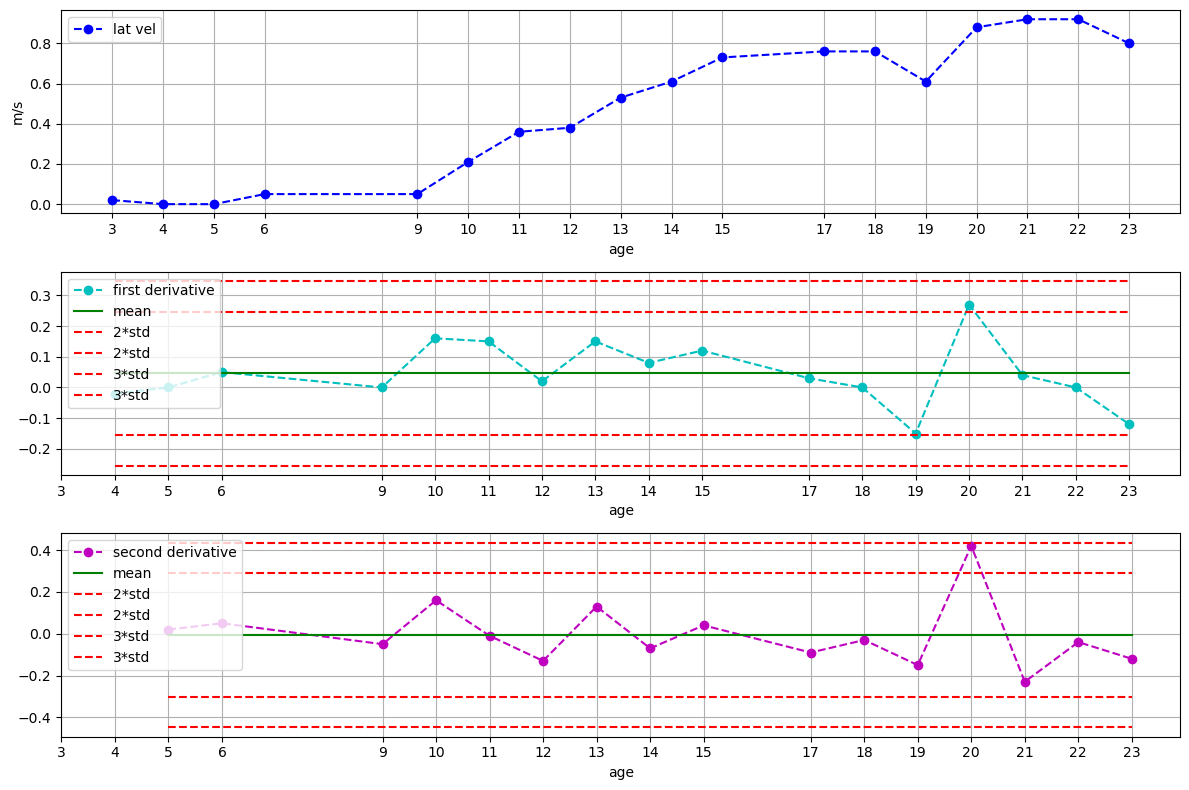

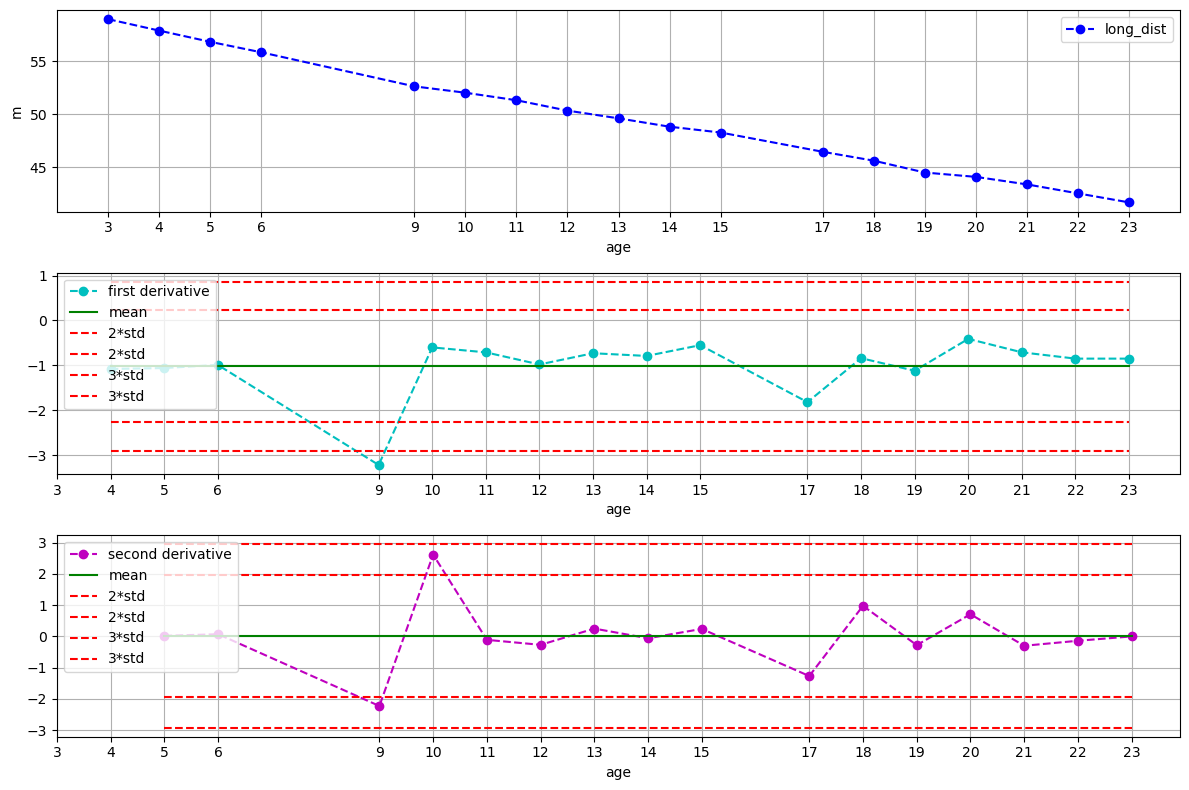

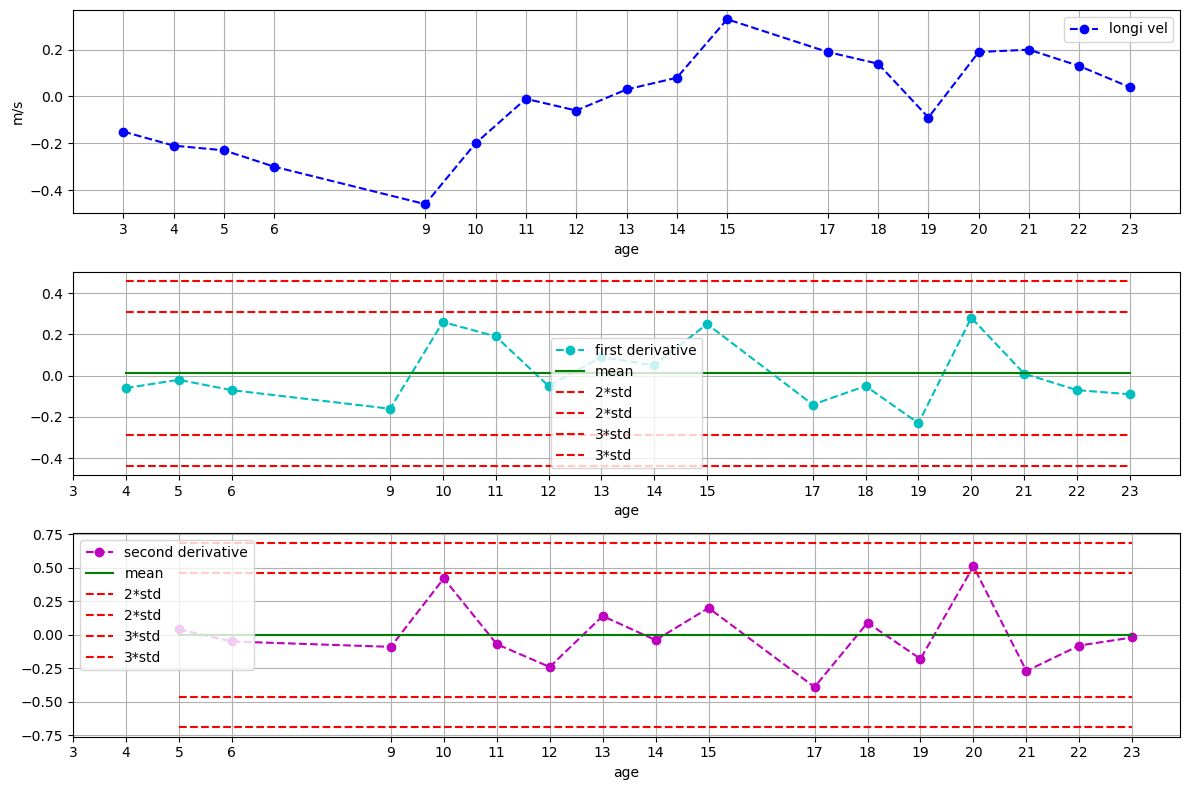

0 with uid:133


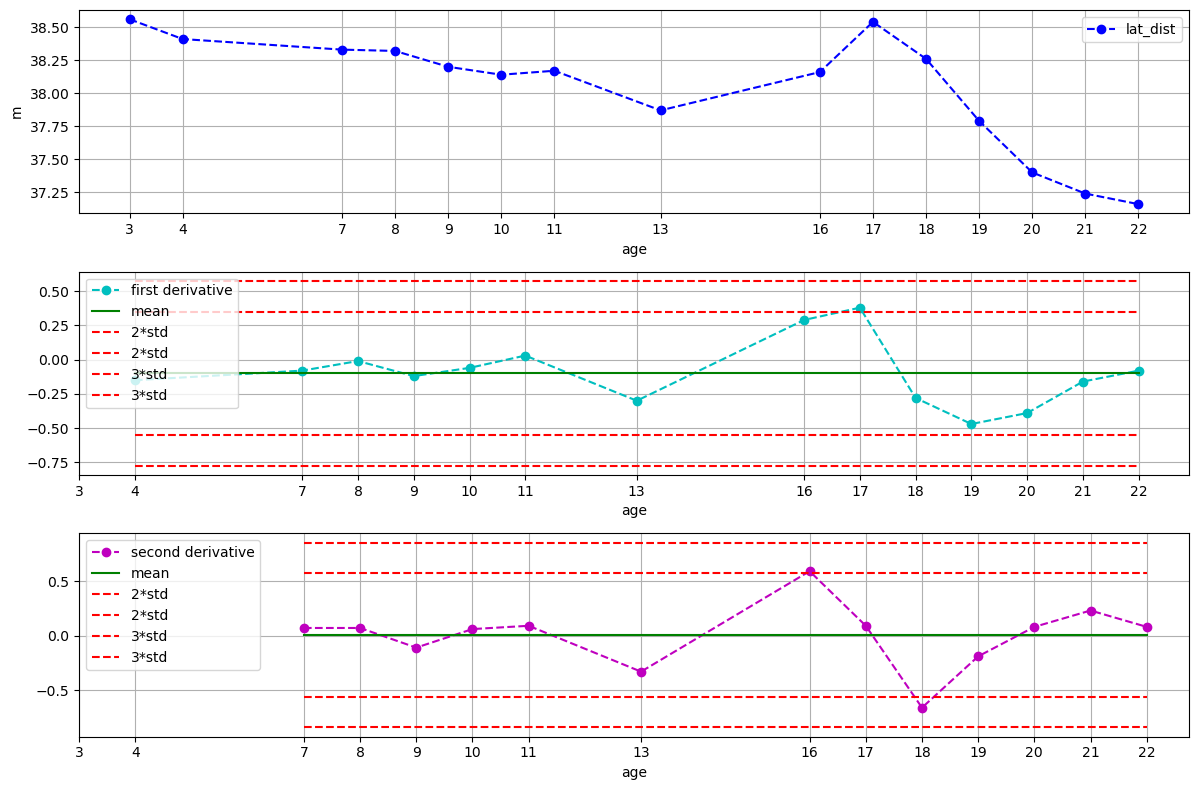

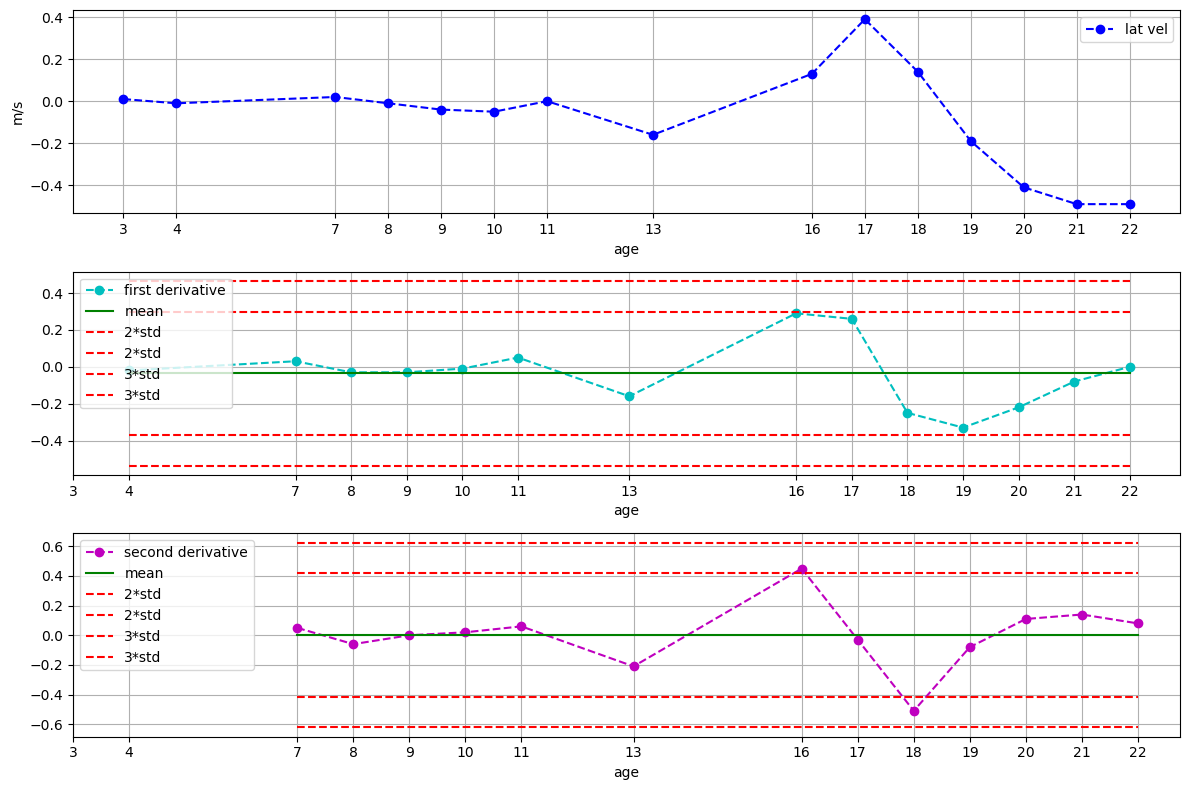

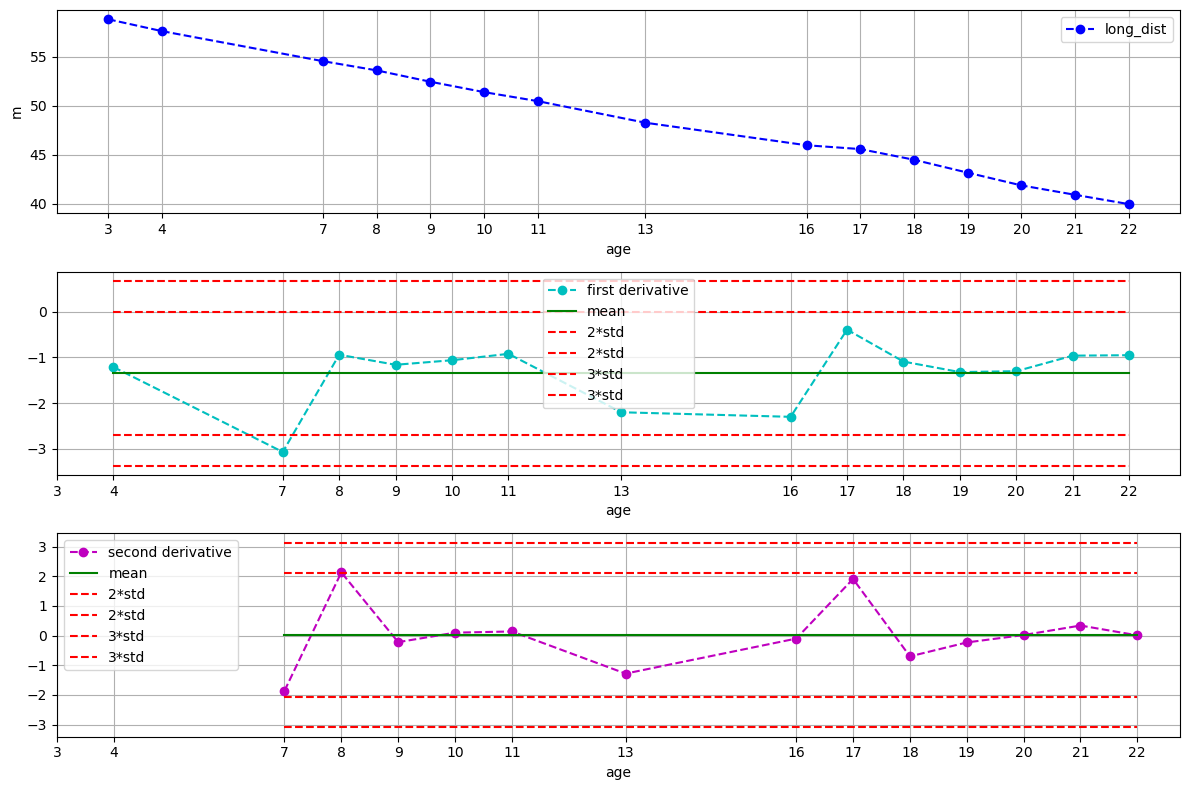

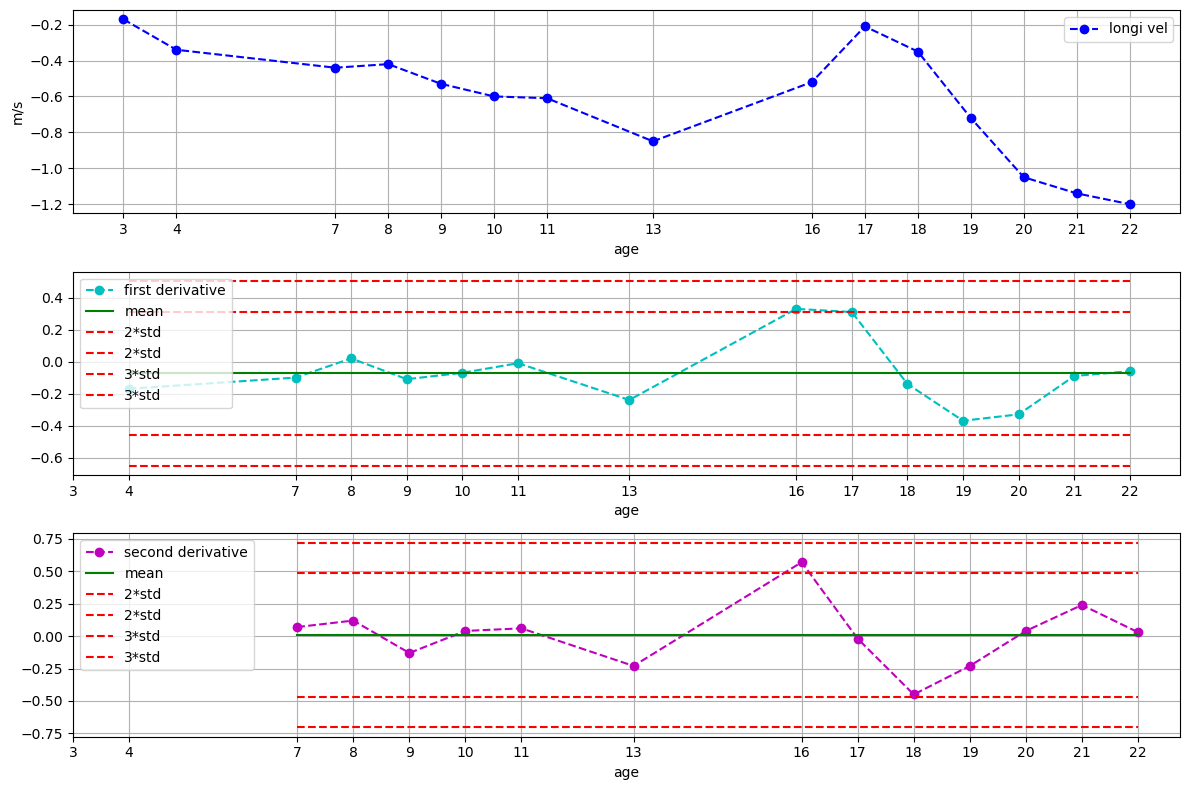

0 with uid:135


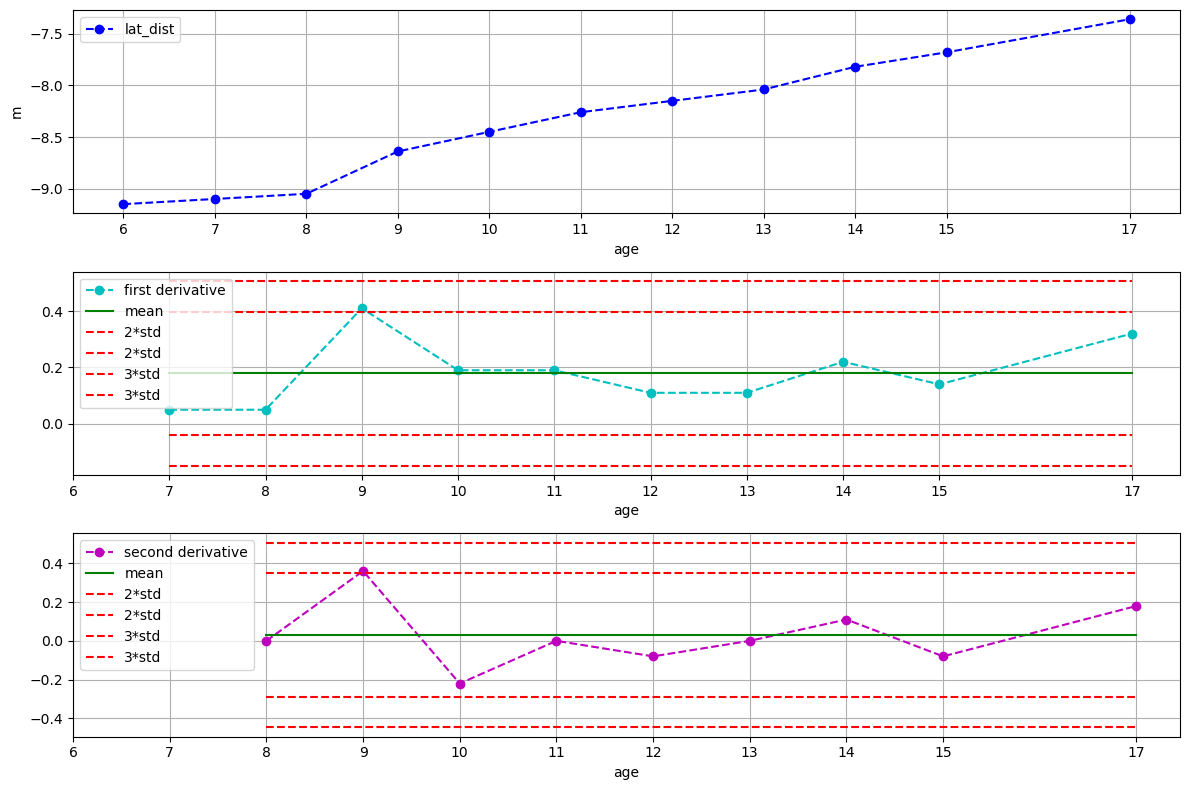

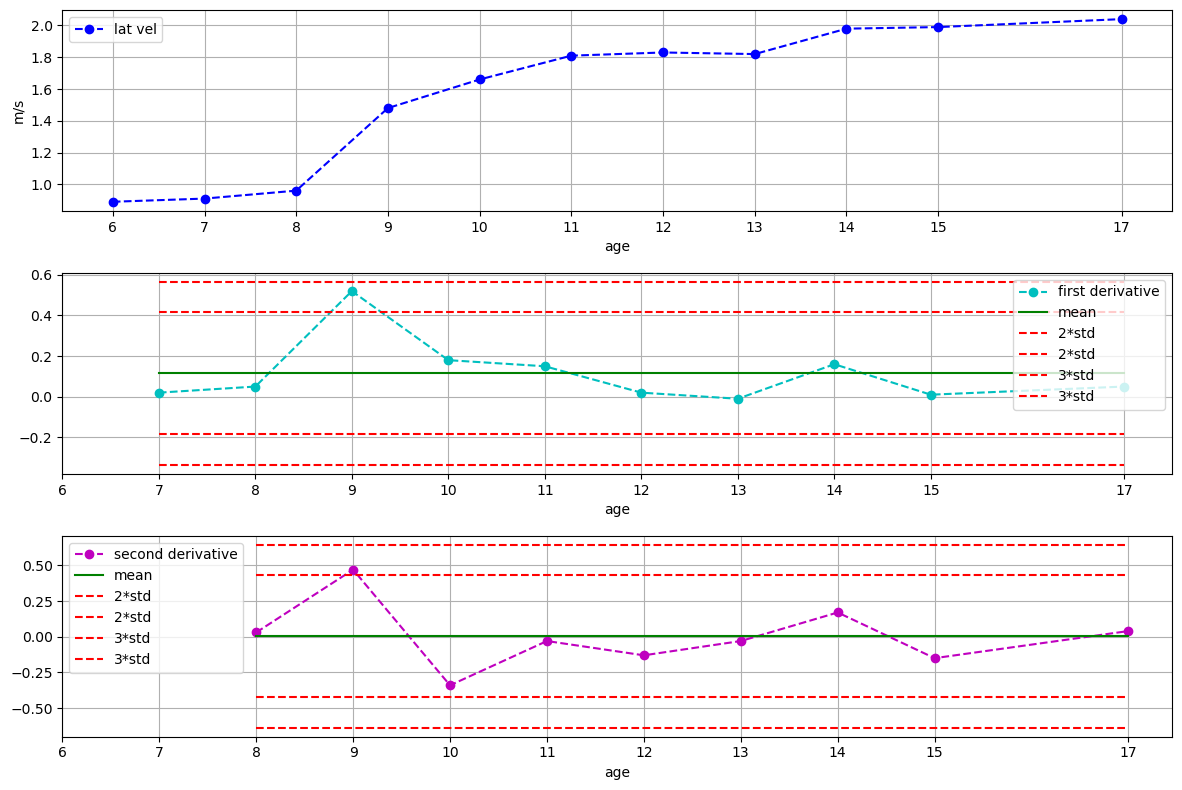

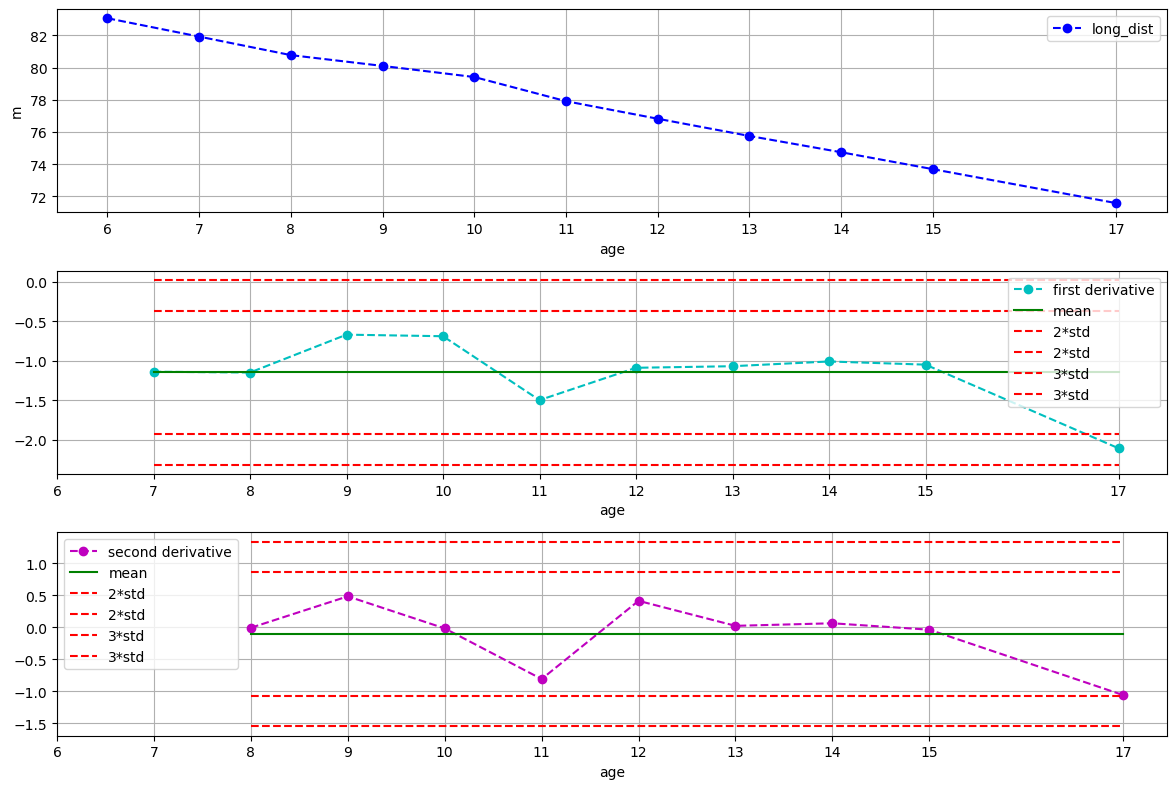

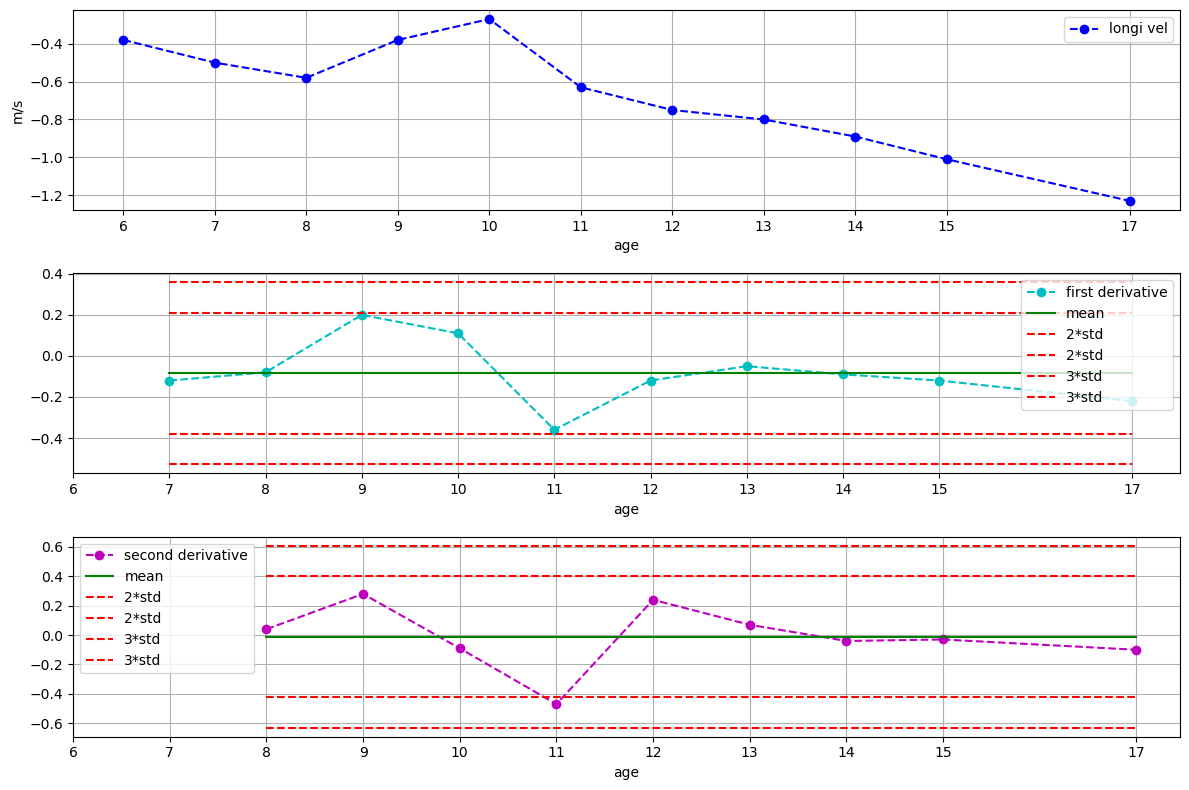

0 with uid:137


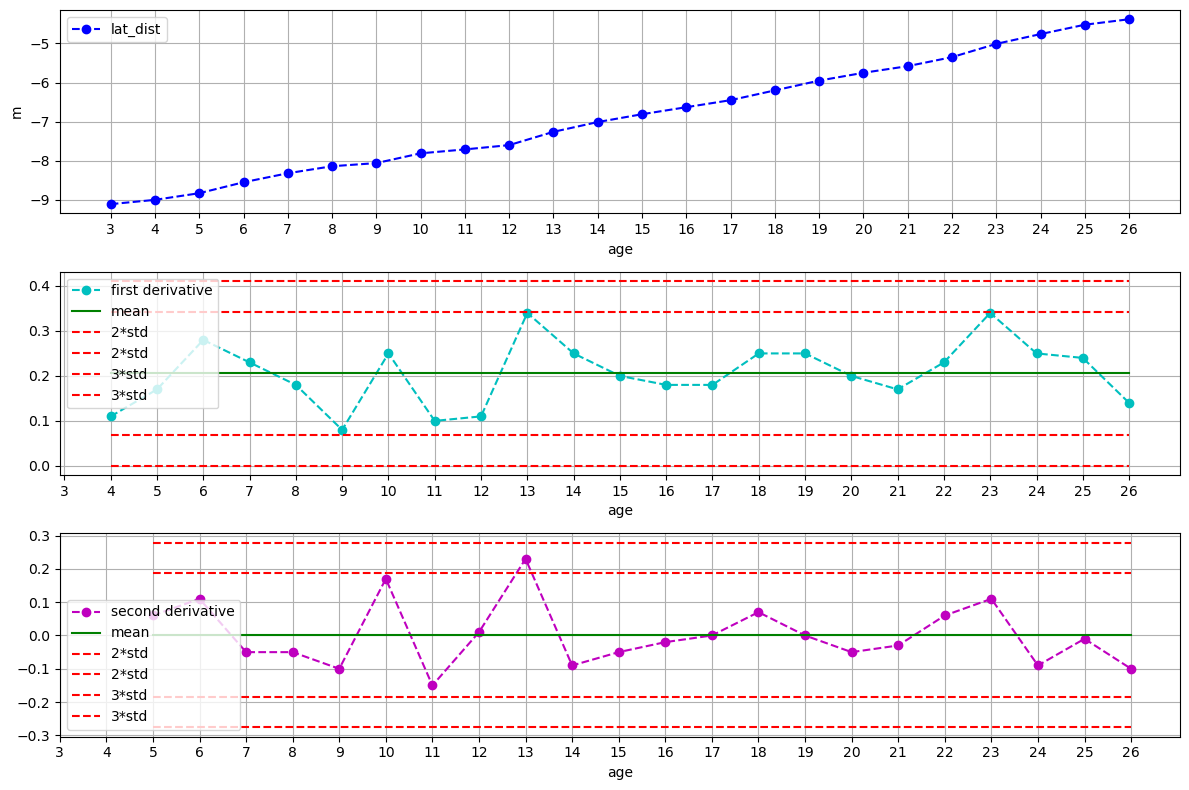

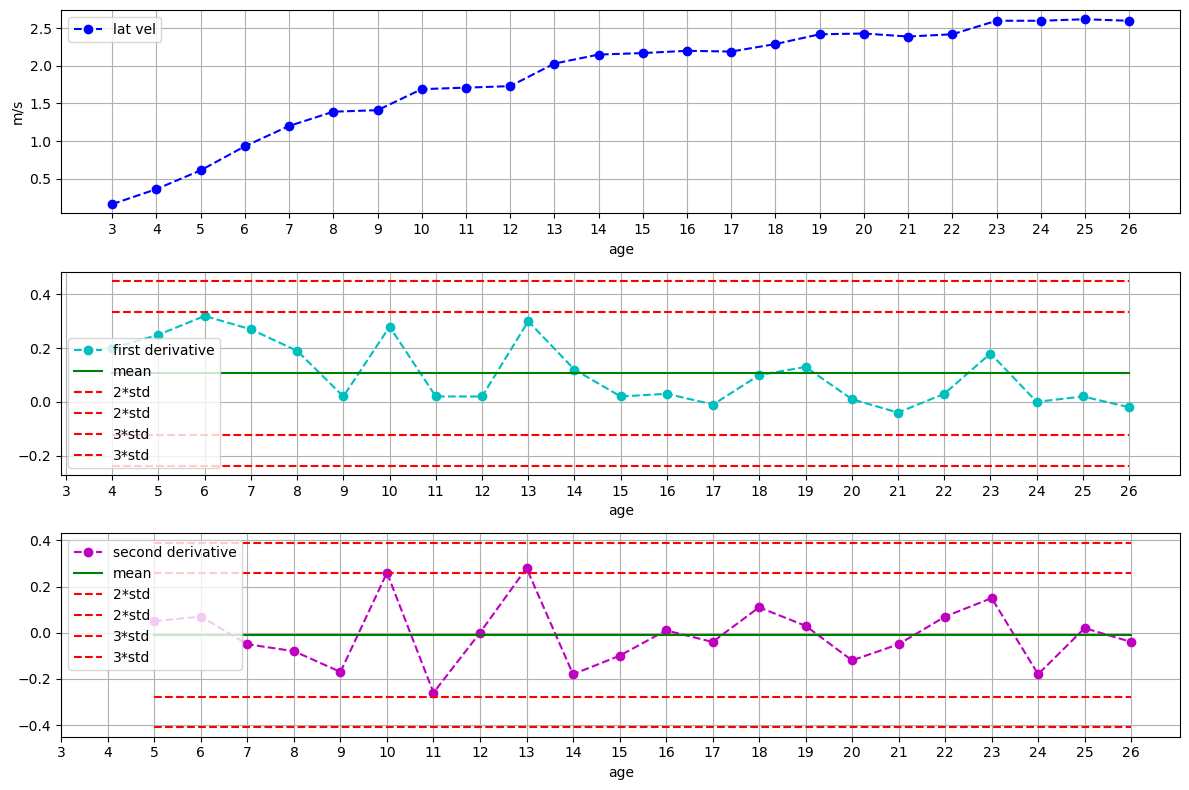

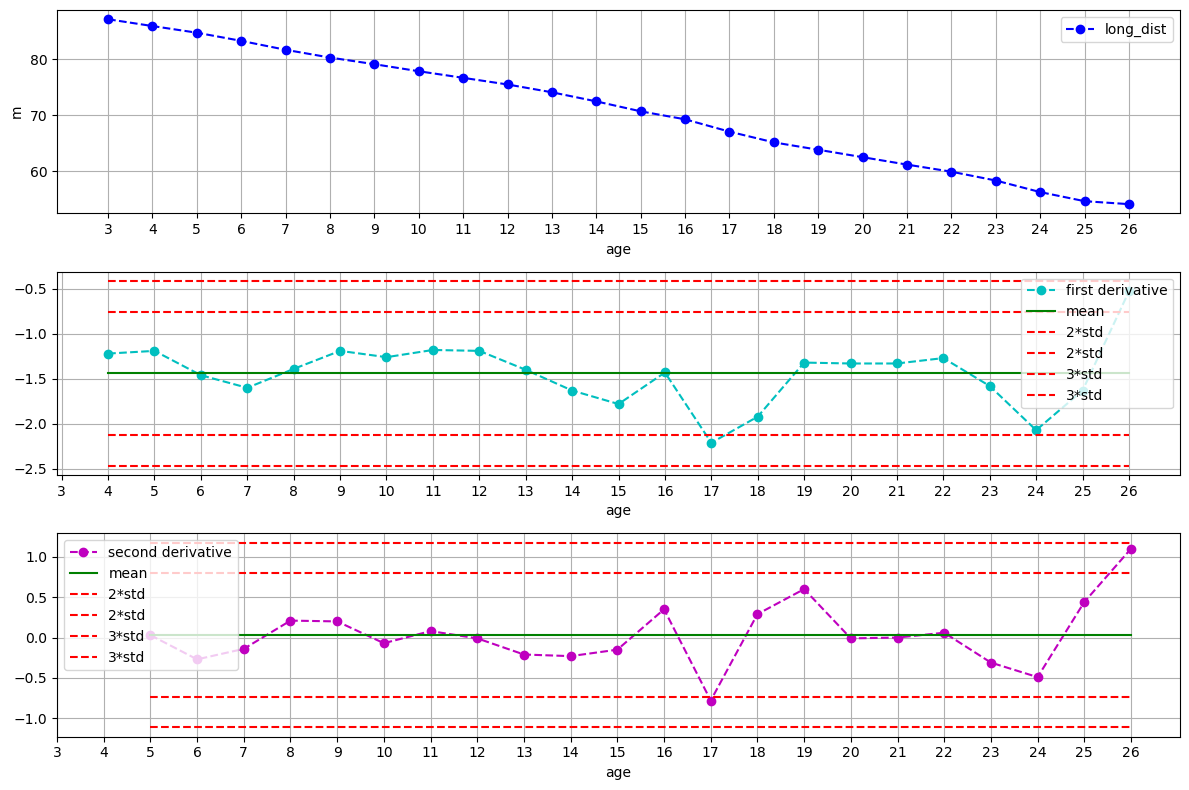

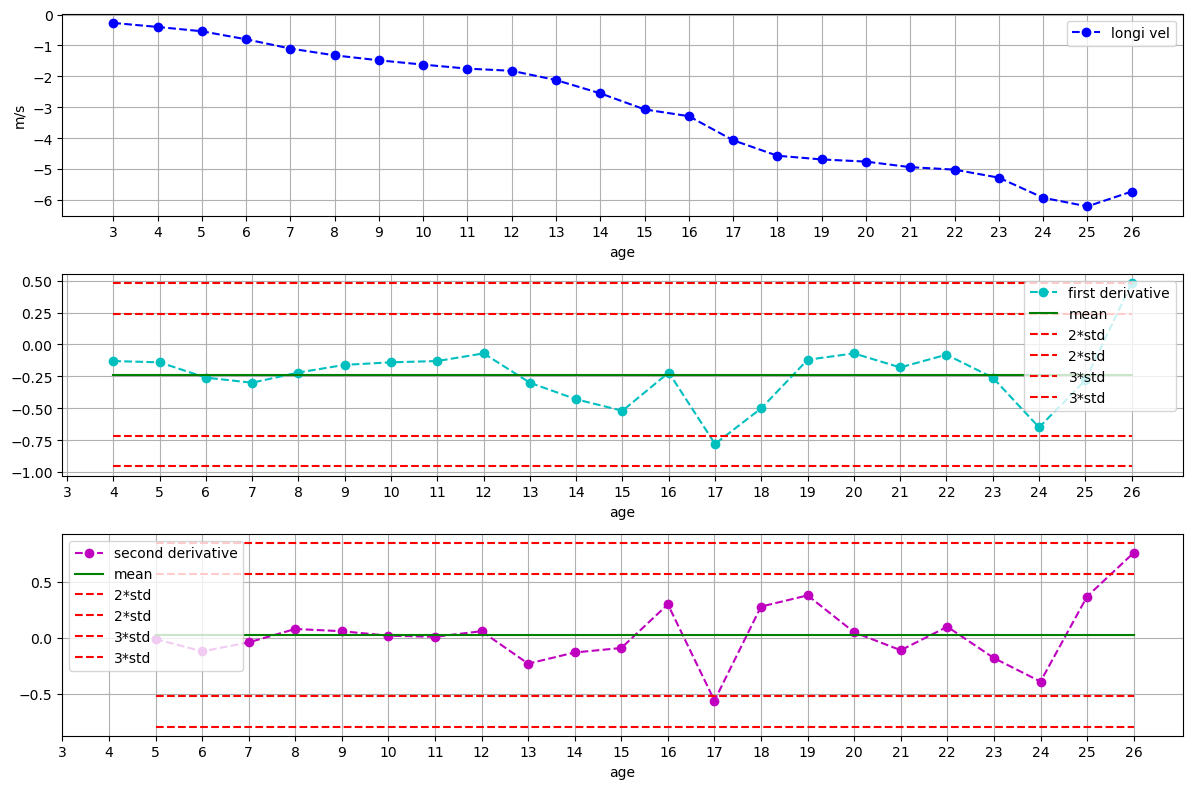

0 with uid:140


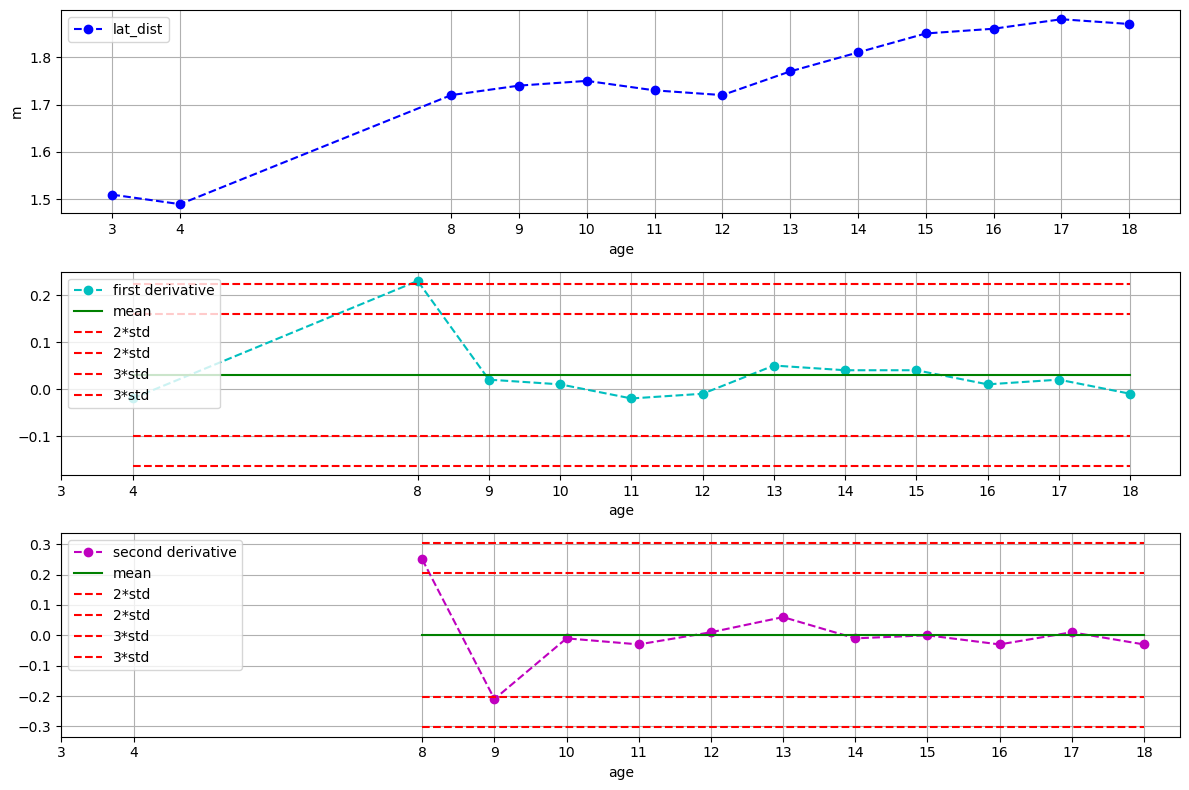

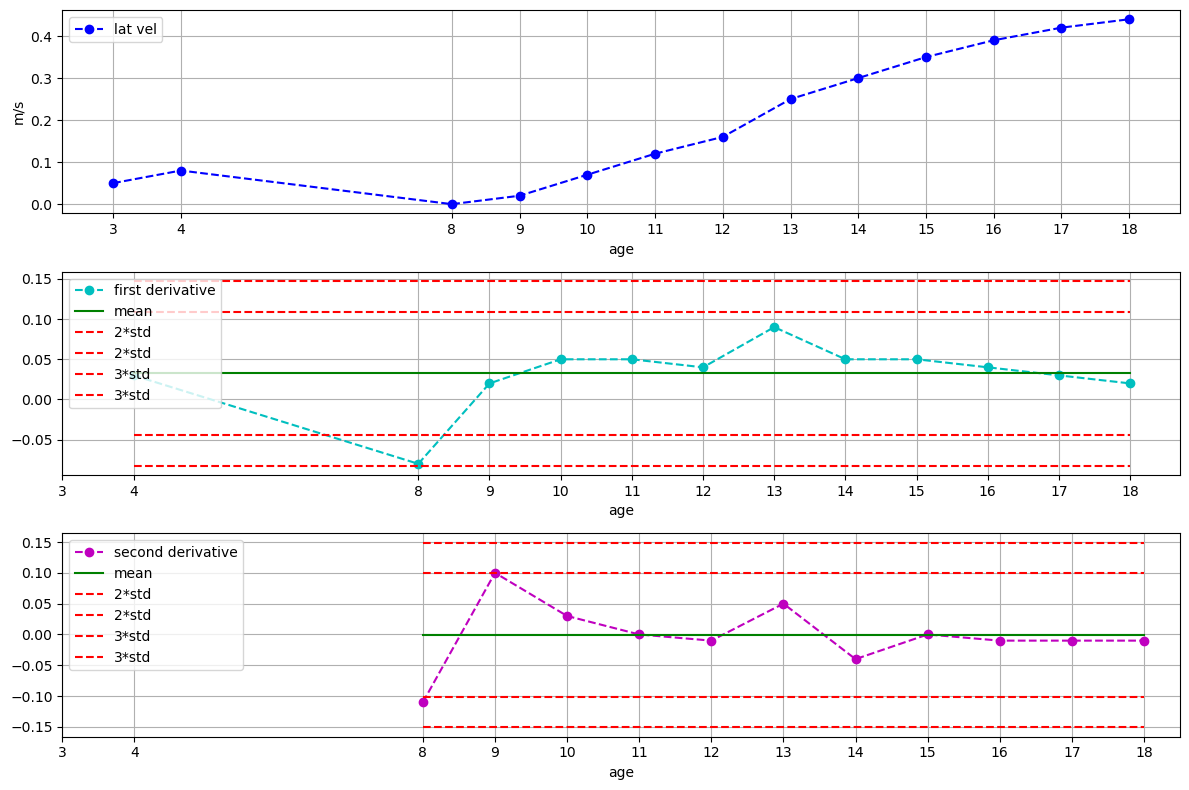

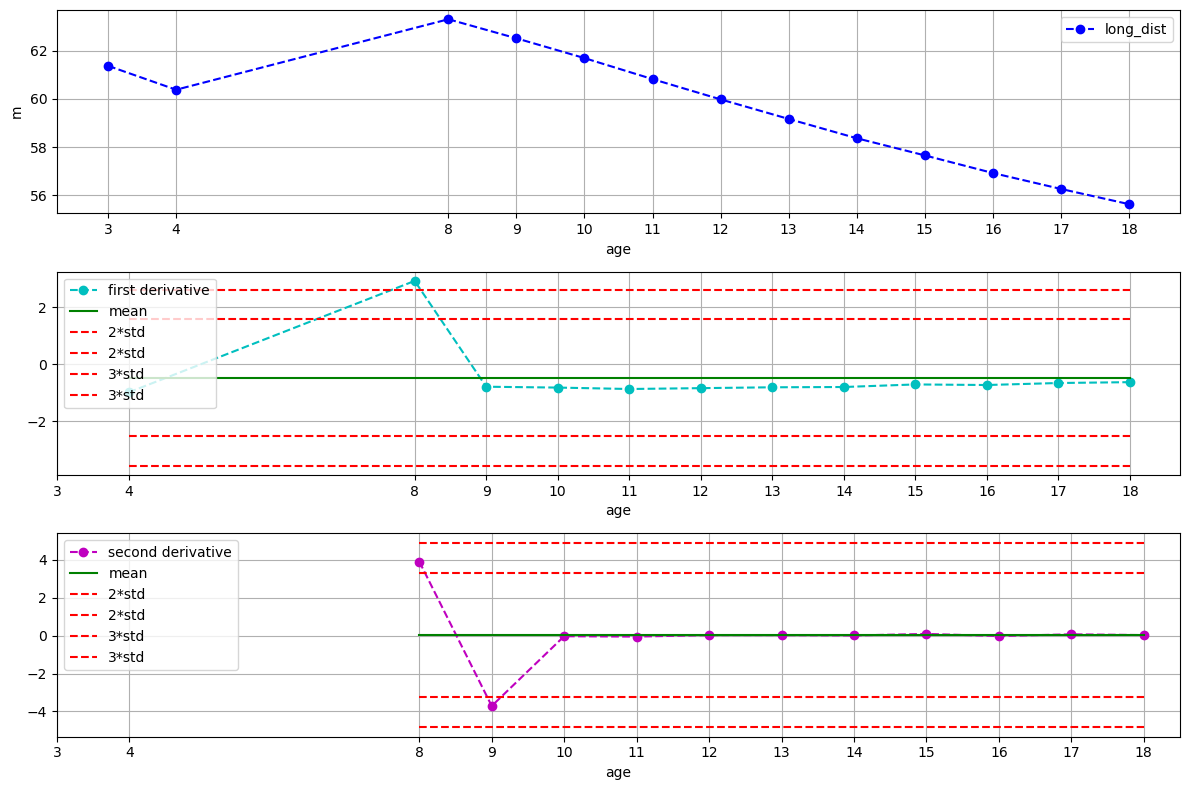

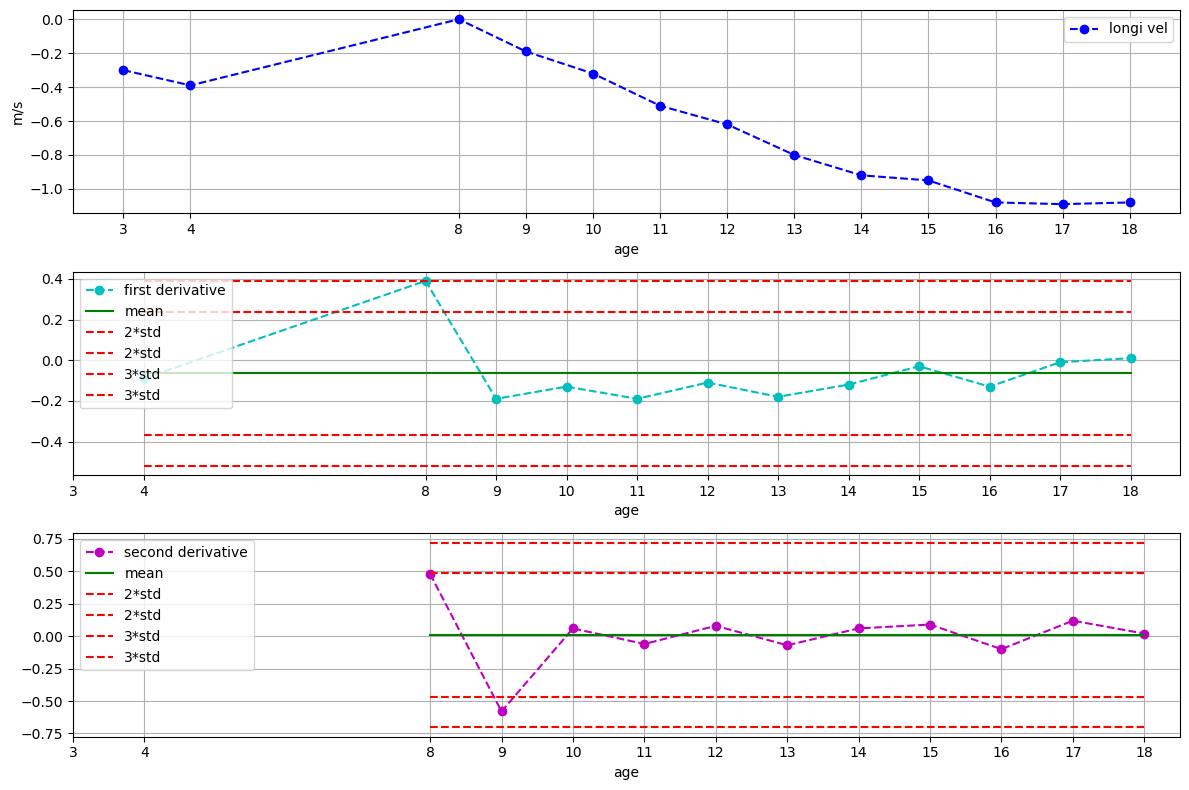

In [63]:
for tracklet in ped_tracklets:
    if tracklet.age > 10:
        print(f'{tracklet.label} with uid:{tracklet.uid}')
        plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.lat_dist, 'lat_dist', 'm')
        plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.abs_vel_x, 'lat vel', 'm/s')
        
        plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.long_dist, 'long_dist', 'm')
        plot_derivatives(tracklet.df['age'].to_numpy(), tracklet.abs_vel_z, 'longi vel', 'm/s')
    